# Test Logistic Regression with Trimming

In [1]:
import numpy as np
import sys
sys.path.append("../src")
import solver
import utils

In [2]:
# load data
data_folder = "../data/"
training_images = np.load(data_folder + "train_images.npy")
training_labels = np.load(data_folder + "train_labels.npy")
testing_images = np.load(data_folder + "test_images.npy")
testing_labels = np.load(data_folder + "test_labels.npy")

image_shape = (28, 28)

training_data = utils.ImageData(training_images, image_shape, labels=training_labels)
testing_data = utils.ImageData(testing_images, image_shape, labels=testing_labels)

In [3]:
model = solver.BinaryLogisticRegression(training_data, lam=0.1, inlier_pct=0.9)

In [4]:
classifier, outliers = model.fit_model(verbose=True)

initial obj: 6.93e-01
iter 1, obj 1.75e-01, err 9.92e+00
iter 2, obj 9.52e-02, err 5.23e+00
iter 3, obj 8.28e-02, err 3.46e+00
iter 4, obj 8.17e-02, err 2.87e+00
iter 5, obj 8.15e-02, err 1.38e+00
iter 6, obj 8.15e-02, err 1.40e+00
iter 7, obj 8.15e-02, err 6.30e-01
iter 8, obj 8.15e-02, err 5.05e-01
iter 9, obj 8.15e-02, err 4.93e-01
iter 10, obj 8.15e-02, err 4.09e-07


In [5]:
classifier.modify_class_labels(np.array([0.0, 1.0]))
pred_labels = classifier.classify_images(testing_images)
print("number of mislabels in testing data:", np.sum(pred_labels != testing_labels))

number of mislabels in testing data: 0


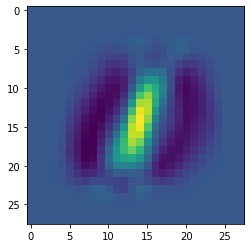

In [6]:
classifier.plot_classifier()

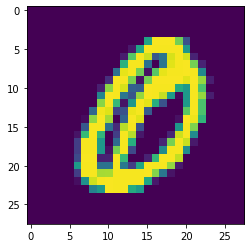

In [7]:
outliers.plot_image(5)